## Many with weight dynamics based on phase

No self-interactions for the time being

$$
\begin{eqnarray*}
    \dot{z_i} & = & z_i \left((\lambda + \mathrm{i}) + b |z_i|^2 \right) + \sum_{k \neq i} W_{ik} \mathrm{Re}(z_k) \\
    \dot{W_{ij}} & = & -\alpha \cos(\angle z_i - \angle z_j) \\
    \dot{W_{ii}} & = & 0
\end{eqnarray*}
$$

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
Nz = 20

# Hopf oscillator characteristics
l = np.random.randn( Nz ) + 2
# TODO Should the Lyopunov exponent vary across oscillators?
b = -0.1 + np.random.randn( Nz ) * 1.j

alpha = 0.1

In [3]:
def deriv( t, y ):
    
    z = y[:Nz]
    W = np.reshape( y[Nz:], (Nz, Nz) )
    
    z_dot = np.zeros( z.shape[0], dtype = np.complex )
    
    for i in range( z_dot.shape[0] ):
        z_dot[i] = z[i] * ( ( l[i] + 1.j ) + b[i] * z[i] * np.conj( z[i] ) )
        
        for k in range( z_dot.shape[0] ):
            if k == i:
                continue
            z_dot[i] += W[i, k] * np.real( z[k] )
#             z_dot[i] += W[i, k] * z[k]
    
#     W_dot = alpha * ( np.eye( Nz ) - np.outer( np.real( z ), np.real( z ) ) )
#     W_dot = alpha * ( np.eye( Nz ) - np.outer( z, np.conj( z ) ) )
    W_dot = np.zeros( W.shape )
    for i in range( W_dot.shape[0] ):
        for j in range( W_dot.shape[1] ):
            if i == j:
                continue
            W_dot[i, j] = -alpha * np.cos( np.angle( z[i] - np.angle( z[j] ) ) )
    
    y_dot = np.zeros( y.shape[0], dtype = np.complex )
    y_dot[:Nz] = z_dot
    y_dot[Nz:] = W_dot.flatten()
    
    return y_dot

In [4]:
t_span = [0, 5e3]
t_eval = np.arange( t_span[0], t_span[-1], 1e-2 )

In [5]:
# TODO Randomize the z0 in an intelligent way
z0 = np.zeros( (Nz,), dtype = np.complex )
for i in range( z0.shape[0] ):
    z0[i] = 0.01 + 0.j
    
W0 = np.random.randn( Nz, Nz ) # + np.random.randn( Nz, Nz ) * 1.j

In [6]:
y0 = np.zeros( (Nz + Nz*Nz,), dtype = np.complex )
y0[:Nz] = z0
y0[Nz:] = W0.flatten()

In [7]:
sol = scipy.integrate.solve_ivp( deriv, t_span, y0,
                                 t_eval = t_eval )

In [8]:
t_star = sol.t
y_star = sol.y

z_star = y_star[:Nz, :]
W_star = np.reshape( y_star[Nz:, :], (Nz, Nz, y_star.shape[1]) )

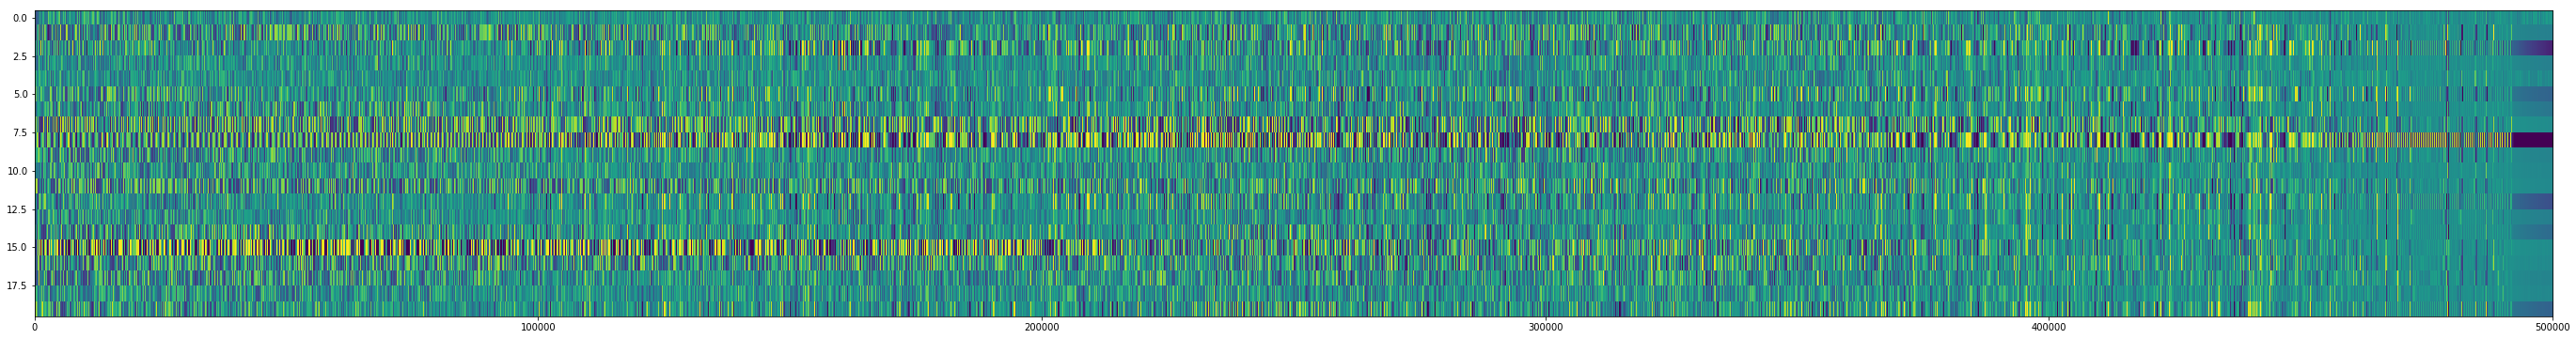

In [9]:
plt.figure( figsize = (48, 6) )
plt.imshow( np.real( z_star ), aspect = 'auto',
            vmin = np.quantile( np.real( z_star ), 0.01 ),
            vmax = np.quantile( np.real( z_star ), 0.99 ) )

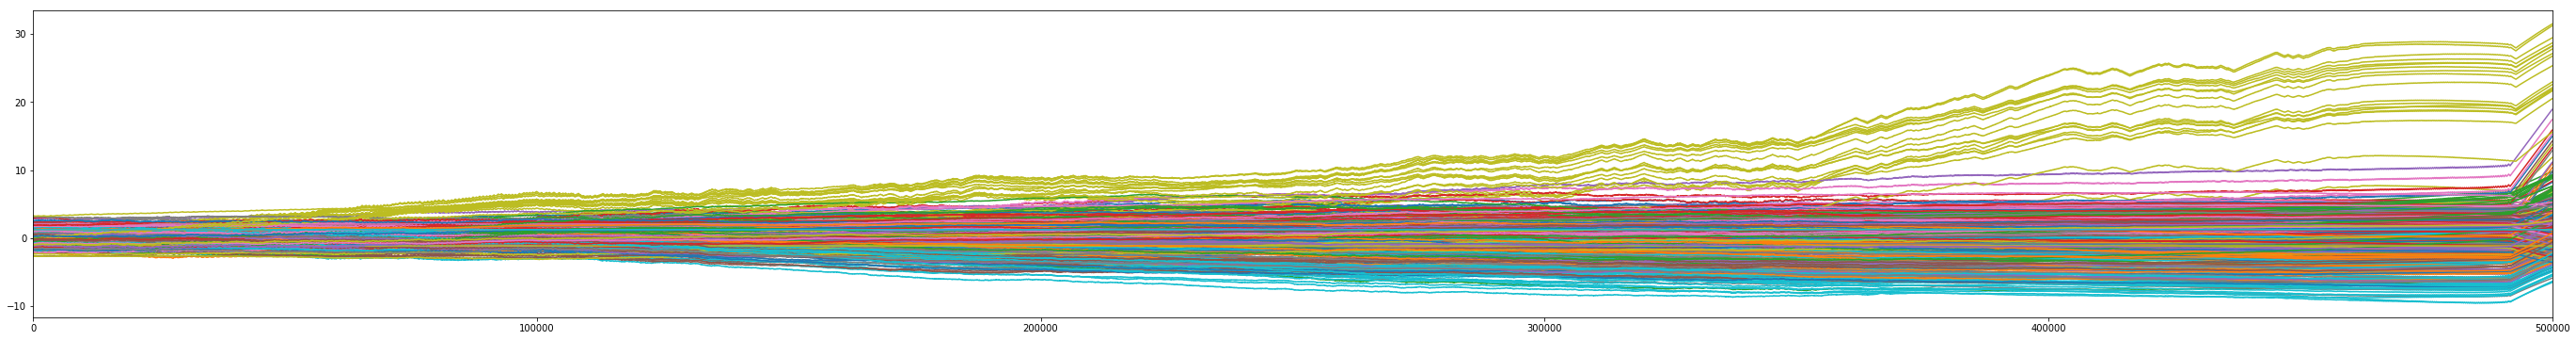

In [10]:
plt.figure( figsize = (48, 6) )
plt.plot( np.real( y_star[Nz:, :].T ) )
plt.xlim( 0, y_star.shape[1] )
plt.show()

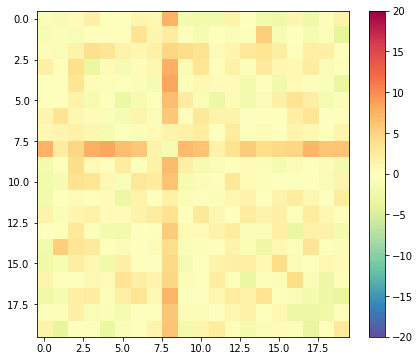

In [11]:
plt.figure( figsize = (7, 6) )
plt.imshow( np.real( W_star[:, :, 90000] + W_star[:, :, 90000].T ), aspect = 'auto', cmap = 'Spectral_r' )
plt.clim( -20, 20 )
plt.colorbar()
plt.show()

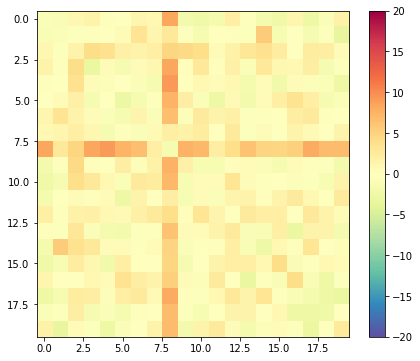

In [12]:
plt.figure( figsize = (7, 6) )
plt.imshow( np.real( W_star[:, :, 98000] + W_star[:, :, 98000].T ), aspect = 'auto', cmap = 'Spectral_r' )
plt.clim( -20, 20 )
plt.colorbar()
plt.show()